In [1]:
import xarray as xr

import data_catalog
import tseries_mod
from CAM_tools import CAM_kg_to_dry_vmr
from utils_units import conv_units, mult_w_units, div_w_units
from utils_plot import plot_1var

%matplotlib inline

In [2]:
data_catalog.set_catalog('experiments')
varnames = ['TS', 'PS', 'TMCO2', 'TMCO2_LND', 'TMCO2_OCN', 'CO2', 'CO2_LND', 'CO2_OCN']
ds_dict = {}

active catalog: experiments


In [3]:
experiment = 'esm-piControl'
ds_dict[experiment] = tseries_mod.tseries_get_vars(varnames, 'atm', experiment, freq='ann').sel(region='Global')
ds_dict[experiment].attrs['experiment'] = experiment

experiment = 'esm-piControl-cmip5'
ds_dict[experiment] = tseries_mod.tseries_get_vars(varnames, 'atm', experiment, stream='cam2.h0', freq='ann').sel(region='Global')
ds_dict[experiment].attrs['experiment'] = experiment

experiment = 'piControl'
ds_dict[experiment] = tseries_mod.tseries_get_vars(varnames, 'atm', experiment, freq='ann').sel(region='Global')
ds_dict[experiment].attrs['experiment'] = experiment

experiment = 'piControl-cmip5'
ds_dict[experiment] = tseries_mod.tseries_get_vars(varnames, 'atm', experiment, stream='cam2.h0', freq='ann').sel(region='Global')
ds_dict[experiment].attrs['experiment'] = experiment


In [4]:
mwC = xr.DataArray(12.0, attrs={'units': 'g/mol'})

for experiment, ds in ds_dict.items():
    print(f'experiment={experiment}')

    # subtract initial value from LND and OCN variable variants
    for varname in ['CO2_LND', 'CO2_OCN', 'TMCO2_LND', 'TMCO2_OCN']:
        ds[varname] -= ds[varname].isel(time=0)

    # add CO2_BOT, CO2_LND_BOT, CO2_OCN_BOT to ds
    for varname in ['CO2', 'CO2_LND', 'CO2_OCN']:
        ds[varname + '_BOT'] = ds[varname].isel(lev=-1)

    # add TMCO2_ppmv, TMCO2_LND_ppmv, TMCO2_OCN_ppmv to ds
    conv_factor = CAM_kg_to_dry_vmr(ds, mwC)
    print(div_w_units(1.0, conv_factor))
    for varname in ['TMCO2', 'TMCO2_LND', 'TMCO2_OCN']:
        da = mult_w_units(conv_factor, ds[varname])
        conv_units(da, 'ppmv')
        ds[varname + '_ppmv'] = da

experiment=esm-piControl
<xarray.DataArray ()>
array(2.11325384e+18)
Coordinates:
    region   <U6 'Global'
Attributes:
    units:    kg
experiment=esm-piControl-cmip5
<xarray.DataArray ()>
array(2.11338567e+18)
Coordinates:
    region   <U6 'Global'
Attributes:
    units:    kg
experiment=piControl
<xarray.DataArray ()>
array(2.11325384e+18)
Coordinates:
    region   <U6 'Global'
Attributes:
    units:    kg
experiment=piControl-cmip5
<xarray.DataArray ()>
array(2.11338567e+18)
Coordinates:
    region   <U6 'Global'
Attributes:
    units:    kg


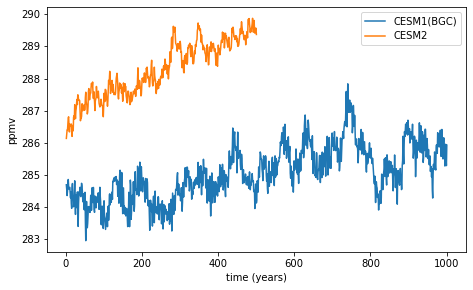

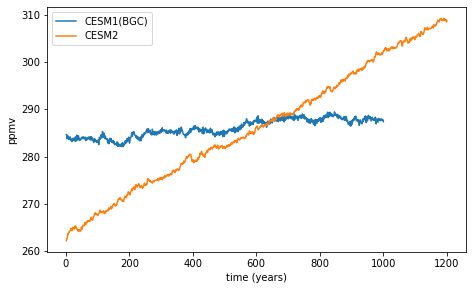

In [5]:
plot_1var('CO2_BOT', [ds_dict['esm-piControl-cmip5'], ds_dict['esm-piControl']],
          ['CESM1(BGC)', 'CESM2'], figsize=(7.5,4.5), fname='CO2_BOT_esm-piControl.pdf')
plot_1var('CO2_BOT', [ds_dict['piControl-cmip5'], ds_dict['piControl']],
          ['CESM1(BGC)', 'CESM2'], figsize=(7.5,4.5));

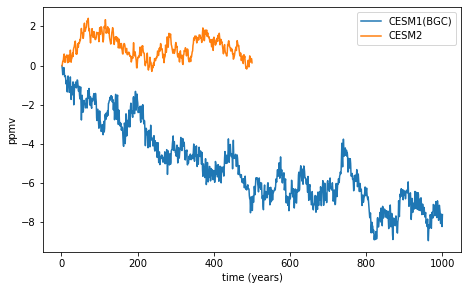

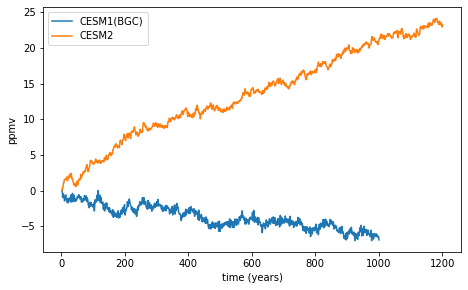

In [6]:
plot_1var('CO2_LND_BOT', [ds_dict['esm-piControl-cmip5'], ds_dict['esm-piControl']],
          ['CESM1(BGC)', 'CESM2'], figsize=(7.5,4.5))
plot_1var('CO2_LND_BOT', [ds_dict['piControl-cmip5'], ds_dict['piControl']],
          ['CESM1(BGC)', 'CESM2'], figsize=(7.5,4.5));

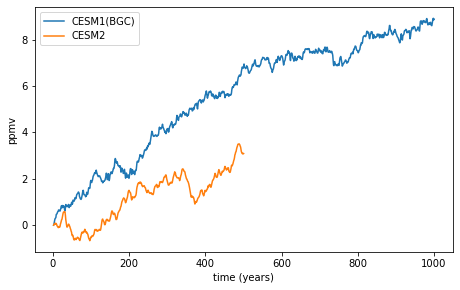

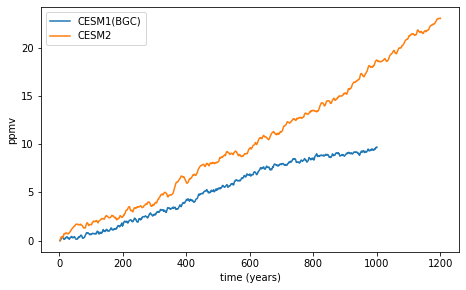

In [7]:
plot_1var('CO2_OCN_BOT', [ds_dict['esm-piControl-cmip5'], ds_dict['esm-piControl']],
          ['CESM1(BGC)', 'CESM2'], figsize=(7.5,4.5))
plot_1var('CO2_OCN_BOT', [ds_dict['piControl-cmip5'], ds_dict['piControl']],
          ['CESM1(BGC)', 'CESM2'], figsize=(7.5,4.5));

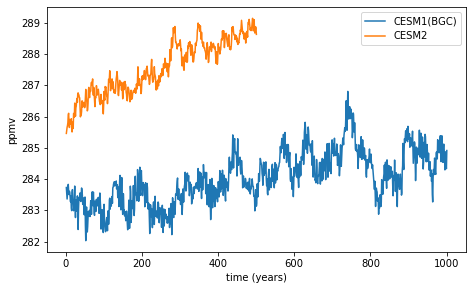

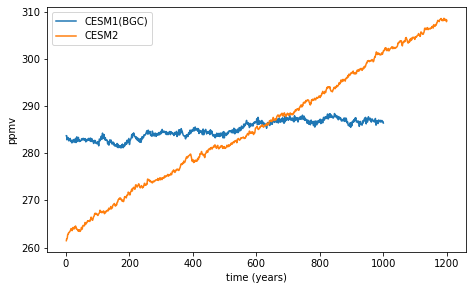

In [8]:
plot_1var('TMCO2_ppmv', [ds_dict['esm-piControl-cmip5'], ds_dict['esm-piControl']],
          ['CESM1(BGC)', 'CESM2'], figsize=(7.5,4.5), fname='TMCO2_esm-piControl.pdf')
plot_1var('TMCO2_ppmv', [ds_dict['piControl-cmip5'], ds_dict['piControl']],
          ['CESM1(BGC)', 'CESM2'], figsize=(7.5,4.5));

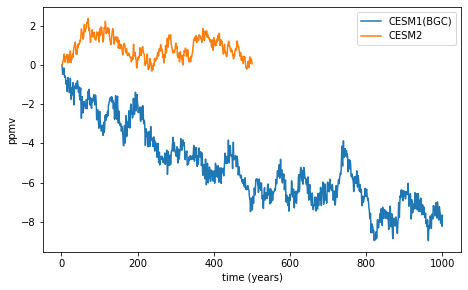

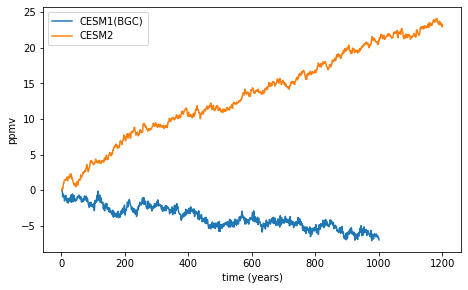

In [9]:
plot_1var('TMCO2_LND_ppmv', [ds_dict['esm-piControl-cmip5'], ds_dict['esm-piControl']],
          ['CESM1(BGC)', 'CESM2'], figsize=(7.5,4.5))
plot_1var('TMCO2_LND_ppmv', [ds_dict['piControl-cmip5'], ds_dict['piControl']],
          ['CESM1(BGC)', 'CESM2'], figsize=(7.5,4.5));

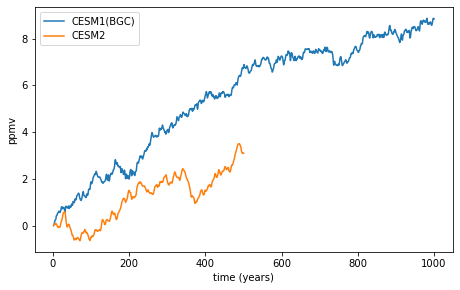

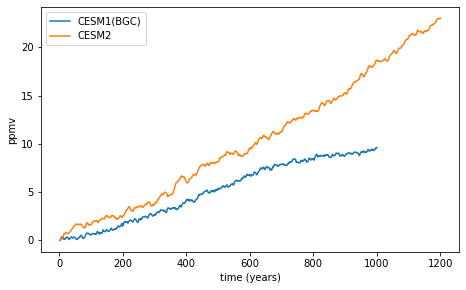

In [10]:
plot_1var('TMCO2_OCN_ppmv', [ds_dict['esm-piControl-cmip5'], ds_dict['esm-piControl']],
          ['CESM1(BGC)', 'CESM2'], figsize=(7.5,4.5))
plot_1var('TMCO2_OCN_ppmv', [ds_dict['piControl-cmip5'], ds_dict['piControl']],
          ['CESM1(BGC)', 'CESM2'], figsize=(7.5,4.5));